# Clustering

- PCA / MDS for visualization
- kmeans for high dimensional data
- silhouett index for cluster quality


#### DBSCAN

In [1]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [5]:
X = pd.read_csv("/home/t44p/PW_rawdata/tr_gc_mutual/tr_mut_transposed.csv", sep=",")
dessicationX = X.iloc[:20,:]
rehydrationX = X.iloc[20:,:]
X.T.shape
X.shape
dessicationX.T.iloc[:,:100].shape


(23565, 20)

### Small random dataset

In [3]:
# Number of samples and features
n_samples = 41
n_features = 1000
# Generate a random matrix with values
data = np.random.rand(n_samples, n_features)
# Generate column names as strings (e.g., Feature1, Feature2, ..., Feature1000)
column_names = [f"Feature{i}" for i in range(1, n_features + 1)]
# Create a DataFrame with the generated data and column names
dataframe = pd.DataFrame(data, columns=column_names)
dataframe.head()  # Display the first few rows of the dataframe



,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature991,Feature992,Feature993,Feature994,Feature995,Feature996,Feature997,Feature998,Feature999,Feature1000
0,0.247430,0.276846,0.160369,0.485662,0.379151,0.928771,0.762299,0.302458,0.013289,0.473767,...,0.990734,0.429072,0.334718,0.502686,0.249495,0.936251,0.362953,0.477046,0.005549,0.791796
1,0.059290,0.100971,0.059832,0.795307,0.584735,0.525709,0.922440,0.030855,0.579729,0.369263,...,0.955603,0.000679,0.187046,0.271382,0.171927,0.472600,0.102790,0.410480,0.693748,0.962280
2,0.574697,0.303027,0.326844,0.554118,0.992655,0.056872,0.183164,0.418009,0.397563,0.273118,...,0.867920,0.368683,0.831254,0.389762,0.325727,0.752063,0.384510,0.682072,0.388709,0.917793
3,0.951964,0.803304,0.654159,0.945053,0.094476,0.168800,0.700272,0.120056,0.040019,0.091323,...,0.871198,0.877100,0.200958,0.906480,0.360670,0.917410,0.640290,0.773873,0.240758,0.326390
4,0.864342,0.768757,0.295079,0.049735,0.947958,0.739342,0.028982,0.721217,0.713375,0.912040,...,0.501077,0.589114,0.592943,0.825338,0.782582,0.769472,0.268846,0.716538,0.078660,0.237353


In [58]:
dataframe.shape

(41, 1000)

## Agglomerative clustering


In [17]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

def hierarchical_feature_reduction(df, n_clusters=10, use_median=False):
    """
    Perform hierarchical clustering on features of a DataFrame and reduce the number of features.

    Parameters:
    -----------
    df : pandas DataFrame
        The input DataFrame with samples as rows and features as columns.
    n_clusters : int
        Number of clusters to form.
    use_median : bool
        If True, use the median feature of each cluster as the representative. 
        If False, use the first feature in each cluster.

    Returns:
    --------
    reduced_df : pandas DataFrame
        DataFrame with reduced features where columns are named after clusters.
    cluster : AgglomerativeClustering object
        The clustering object containing the clustering information.
    cluster_feature_map : dict
        A dictionary mapping each cluster to its corresponding original DataFrame column names.
    """

    # Compute the correlation matrix
    corr_matrix = np.corrcoef(df.T)

    # Perform hierarchical clustering
    Z = linkage(corr_matrix, 'average')

    # Plot the dendrogram for visual analysis (optional)
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.show()

    # Form clusters
    cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='average')
    cluster.fit_predict(corr_matrix)

    # Map each feature to its cluster with column names
    feature_names = df.columns
    clustered_features = pd.Series(feature_names, index=cluster.labels_).groupby(level=0).apply(list)

    # Dictionary for cluster to feature name mapping
    cluster_feature_map = {cluster: features for cluster, features in clustered_features.items()}

    # Select representative features
    if use_median:
        # Use the median feature in each cluster
        reduced_features = [clustered_features.iloc[int(np.median(range(len(features))))] for features in clustered_features]
    else:
        # Use the first feature in each cluster
        reduced_features = [features[0] for features in clustered_features]

    # Reduced dataset with cluster names as columns
    reduced_df = df[reduced_features]
    reduced_df.columns = ['Cluster_' + str(i) for i in range(n_clusters)]

    print("Original number of features:", df.shape[1])
    print("Reduced number of features:", reduced_df.shape[1])

    return reduced_df, cluster, cluster_feature_map

# Example usage:
# df = ... # your DataFrame
# reduced_df, cluster_obj, cluster_map = hierarchical_feature_reduction(df, n_clusters=10, use_median=True)


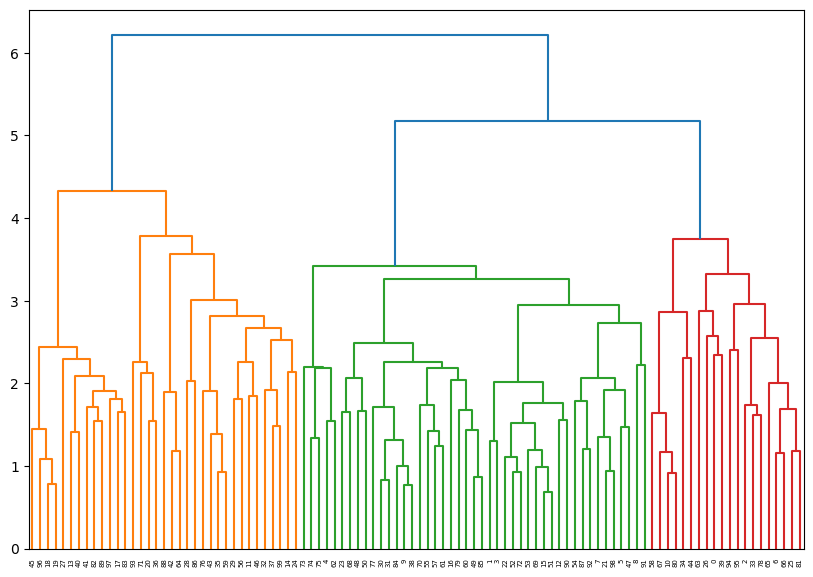

/home/yhesse/.conda/envs/ida_tf/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


IndexError: single positional indexer is out-of-bounds

In [18]:
reduced_df, cluster_obj, feature_map = hierarchical_feature_reduction(X.iloc[:,:100], n_clusters=10, use_median=True)

In [46]:
Counter(cluster_obj.labels_)

Counter({3: 4, 2: 21, 1: 10, 7: 5, 4: 19, 5: 6, 0: 15, 8: 13, 9: 4, 6: 3})

In [56]:
reduced_df.columns

Index(['Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_0', 'Cluster_4',
       'Cluster_2', 'Cluster_6', 'Cluster_7', 'Cluster_8', 'Cluster_2'],
      dtype='object')

In [57]:
feature_map

{0: [11, 14, 24, 28, 29, 32, 35, 37, 43, 46, 56, 59, 76, 86, 99],
 1: [2, 6, 25, 33, 65, 66, 78, 81, 94, 95],
 2: [1,
  3,
  5,
  7,
  8,
  12,
  15,
  21,
  22,
  47,
  51,
  52,
  53,
  54,
  69,
  72,
  87,
  90,
  91,
  92,
  98],
 3: [0, 26, 39, 63],
 4: [9,
  16,
  23,
  30,
  31,
  38,
  48,
  49,
  50,
  55,
  57,
  60,
  61,
  68,
  70,
  77,
  79,
  84,
  85],
 5: [10, 34, 44, 58, 67, 80],
 6: [42, 64, 88],
 7: [4, 62, 73, 74, 75],
 8: [13, 17, 18, 19, 27, 40, 41, 45, 82, 83, 89, 96, 97],
 9: [20, 36, 71, 93]}

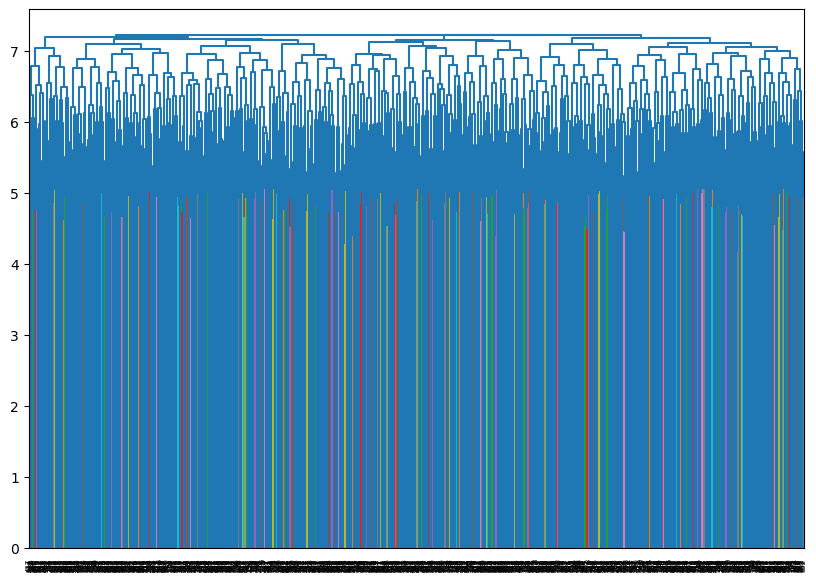

In [4]:
# Assuming `data` is your 41 x 22000 matrix
# data = ...

# Step 1: Compute the correlation matrix
corr_matrix = np.corrcoef(data.T)

# Step 2: Perform hierarchical clustering
Z = linkage(corr_matrix, 'average')

# Optional: Plot the dendrogram for visual analysis
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()


In [5]:

# Step 3: Form clusters - choose the number of clusters based on dendrogram
n_clusters = 10  # Example value, adjust based on your analysis
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='average')
cluster.fit_predict(corr_matrix)

# Step 4: Reduce features by selecting a representative for each cluster
feature_indices = range(data.shape[1])
clustered_features = pd.Series(feature_indices, index=cluster.labels_).groupby(level=0).apply(list)

# Select a representative (e.g., first feature in each cluster)
reduced_features_indices = [features[0] for features in clustered_features]

# Reduced dataset
reduced_data = data[:, reduced_features_indices]

print("Original number of features:", data.shape[1])
print("Reduced number of features:", reduced_data.shape[1])


Original number of features: 1000
Reduced number of features: 10


/home/yhesse/.conda/envs/ida_tf/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [6]:
Counter(cluster.labels_)

Counter({0: 228,
         1: 118,
         2: 140,
         3: 126,
         9: 70,
         4: 78,
         5: 58,
         8: 36,
         7: 53,
         6: 93})

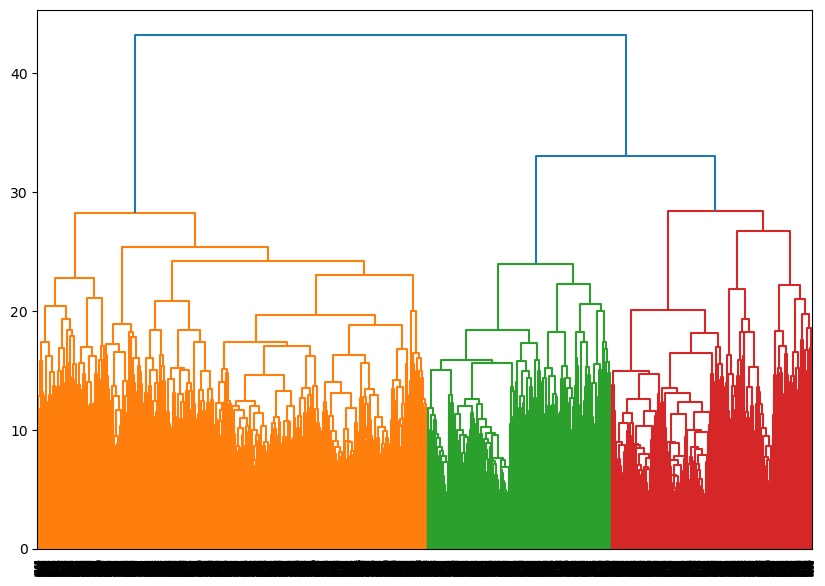

In [16]:
# Assuming `data` is your 41 x 22000 matrix
# data = ...
data= X.iloc[:,:5000]
# Step 1: Compute the correlation matrix
corr_matrix = np.corrcoef(data.T)

# Step 2: Perform hierarchical clustering
Z = linkage(corr_matrix, 'average')

# Optional: Plot the dendrogram for visual analysis
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()


In [17]:

# Step 3: Form clusters - choose the number of clusters based on dendrogram
n_clusters = 400  # Example value, adjust based on your analysis
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='average')
cluster.fit_predict(corr_matrix)

# Step 4: Reduce features by selecting a representative for each cluster
"""feature_indices = range(data.shape[1])
clustered_features = pd.Series(feature_indices, index=cluster.labels_).groupby(level=0).apply(list)

# Select a representative (e.g., first feature in each cluster)
reduced_features_indices = [features[0] for features in clustered_features]

# Reduced dataset
reduced_data = data[:, reduced_features_indices]

print("Original number of features:", data.shape[1])
print("Reduced number of features:", reduced_data.shape[1])
"""

/home/yhesse/.conda/envs/ida_tf/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


'feature_indices = range(data.shape[1])\nclustered_features = pd.Series(feature_indices, index=cluster.labels_).groupby(level=0).apply(list)\n\n# Select a representative (e.g., first feature in each cluster)\nreduced_features_indices = [features[0] for features in clustered_features]\n\n# Reduced dataset\nreduced_data = data[:, reduced_features_indices]\n\nprint("Original number of features:", data.shape[1])\nprint("Reduced number of features:", reduced_data.shape[1])\n'

In [23]:

#Counter(cluster.labels_)

In [6]:
def dbscan(X, reducer='pca', n_components=2, random_state=0, eps=0.5, min_samples=5, scale=True, plot_pca=True, n_jobs=1):
    if scale:
        data = StandardScaler().fit_transform(X.T)
    else:
        data = X.T
        
    if reducer == 'pca':
        print('pca')
        pca = PCA(n_components=n_components)
        data_reduced = pca.fit_transform(data)
    elif reducer == 'mds':
        print('mds')
        mds = MDS(n_components=n_components, random_state=random_state, n_jobs=n_jobs)
        data_reduced = mds.fit_transform(data)
    elif reducer == 'tsne':
        print('tsne')
        tsne = TSNE(n_components=n_components, random_state=random_state, n_jobs=n_jobs)
        data_reduced = tsne.fit_transform(data)
    elif reducer == 'None':
        print('DBSCAN without dimensionality reduction')
        data_reduced = data
    else:
        raise Exception(f"Sorry, unknown parameter, reducer={reducer}") 
    
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=n_jobs)
    clusters = dbscan.fit_predict(data_reduced)
    
    if plot_pca and n_components==2:
        # Plotting the results
        plt.figure(figsize=(10, 6))
        plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=clusters, cmap='plasma', marker='o', s=50, alpha=0.7)
        #plt.title('DBSCAN Clustering (PCA-reduced Data)')
        plt.xlabel(f'{reducer} Component 1')
        plt.ylabel(f'{reducer} Component 2')
        plt.colorbar(label='Cluster Label')
        plt.show()
        print(f"cluster population: \n{Counter(clusters)}")        
        return clusters
    else:
        print(f"cluster population: \n{Counter(clusters)}")        
        return clusters
        


    

# PCA + DBSCAN

DBSCAN: 
cluster nr (-1) is all features considered as noise

pca


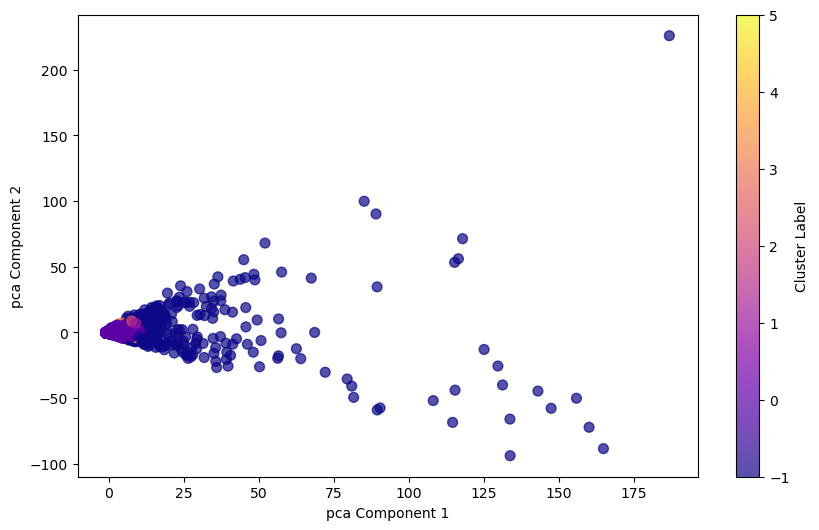

cluster population: 
Counter({0: 23243, -1: 294, 2: 8, 3: 6, 1: 5, 5: 5, 4: 4})


In [5]:
dbscan_cluster = dbscan(X.iloc[:,:], reducer='pca', eps=0.7, min_samples=5, n_jobs=15)

In [44]:
set(dbscan_cluster)

{-1, 0}

In [66]:
X.columns[np.where(dbscan_cluster == 2)[0]]

Index(['Xele.ptg000045l.79', 'Xele.ptg000037l.252', 'Xele.ptg000018l.809',
       'Xele.ptg000041l.114', 'Xele.ptg000020l.411', 'Xele.ptg000024l.314',
       'Xele.ptg000059l.36', 'Xele.ptg000046l.177'],
      dtype='object')

# MDS + DBSCAN


DBSCAN without dimensionality reduction


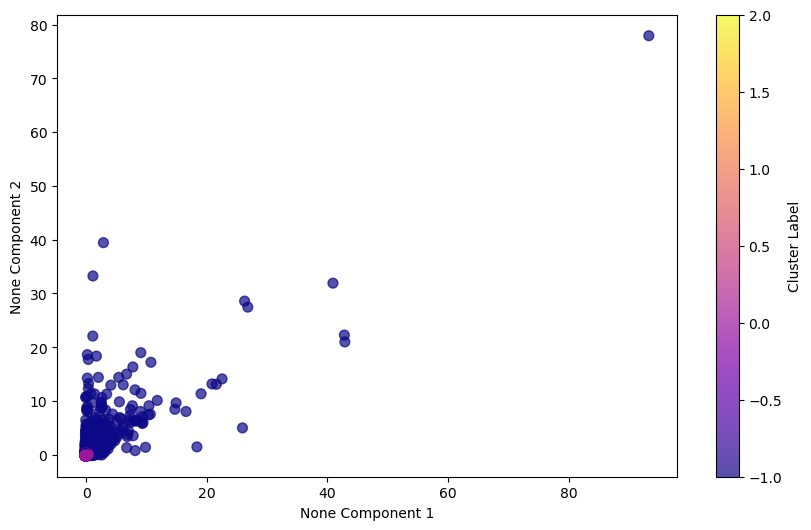

cluster population: 
Counter({0: 21369, -1: 2187, 2: 5, 1: 4})


In [11]:
dbscan_cluster = dbscan(X.iloc[:,:], reducer='None', eps=0.5, min_samples=5, n_jobs=15)

In [13]:
dbscan_cluster = dbscan(X.iloc[:,:], reducer='mds', eps=0.5, min_samples=5, n_jobs=5)

mds


/home/yhesse/.conda/envs/ida_tf/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

In [28]:
def kmeans_lbow(X, scale=True, reducer='pca', n_components=2, k_values=range(1, 11),random_state=0, n_jobs=None):
    if scale:
        data = StandardScaler().fit_transform(X.T)
    else:
        data = X.T
        
    if reducer == 'pca':
        print('pca')
        pca = PCA(n_components=n_components)
        data_reduced = pca.fit_transform(data)
    elif reducer == 'mds':
        print('mds')
        mds = MDS(n_components=n_components, random_state=random_state, n_jobs=n_jobs)
        data_reduced = mds.fit_transform(data)
    elif reducer == 'tsne':
        print('tsne')
        tsne = TSNE(n_components=n_components, random_state=random_state, n_jobs=n_jobs)
        data_reduced = tsne.fit_transform(data)
    elif reducer == 'None':
        print('without dimensionality reduction')
        data_reduced = data
    else:
        raise Exception(f"Sorry, unknown parameter, reducer={reducer}") 
        
    inertia = []
    #k_values = range(1, 11)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=random_state).fit(data_reduced)
        inertia.append(kmeans.inertia_)
        
    # Plotting the Elbow Method
    print("inertia: Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.")
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=k_values, y=inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    return data_reduced

pca


/home/yhesse/.conda/envs/ida_tf/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yhesse/.conda/envs/ida_tf/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yhesse/.conda/envs/ida_tf/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yhesse/.conda/envs/ida_tf/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

inertia: Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.


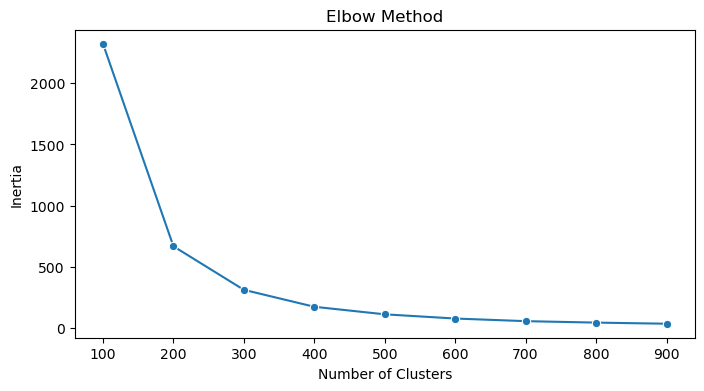

In [52]:
kmeans_reduced_data = kmeans_lbow(X.iloc[:,:], k_values=range(100, 1000, 100))

In [2]:
def kmeans_on_reduced_data(X, k, reducer='pca', scale=True, n_components=2, random_state=0, n_jobs=None):
    if scale:
        data = StandardScaler().fit_transform(X.T)
    else:
        data = X.T
        
    if reducer == 'pca':
        print('pca')
        pca = PCA(n_components=n_components)
        data_reduced = pca.fit_transform(data)
    elif reducer == 'mds':
        print('mds')
        mds = MDS(n_components=n_components, random_state=random_state, n_jobs=n_jobs)
        data_reduced = mds.fit_transform(data)
    elif reducer == 'tsne':
        print('tsne')
        tsne = TSNE(n_components=n_components, random_state=random_state, n_jobs=n_jobs)
        data_reduced = tsne.fit_transform(data)
    elif reducer == 'None':
        print('without dimensionality reduction')
        data_reduced = data
    else:
        raise Exception(f"Sorry, unknown parameter, reducer={reducer}") 
        
    kmeans = KMeans(n_clusters=k, random_state=random_state).fit(data_reduced)
    silhouette_avg = silhouette_score(data_reduced, kmeans.labels_)
    print(f'Silhouette Score for {k} clusters: {silhouette_avg:.2f}')
    # Plotting the clusters
    plt.figure(figsize=(8, 6))
    #sns.scatterplot(x=data_reduced[:, 0], y=data_reduced[:, 1], hue=kmeans.labels_, palette='viridis', legend='full')
    plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=kmeans.labels_, cmap='plasma', marker='o', s=50, alpha=0.7)
    
    plt.title('K-means Clustering with Dimensionality reduced Data')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()
    
    return kmeans

NoneType

pca


/home/t44p/miniconda3/envs/ida_tf/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 200 clusters: 0.42


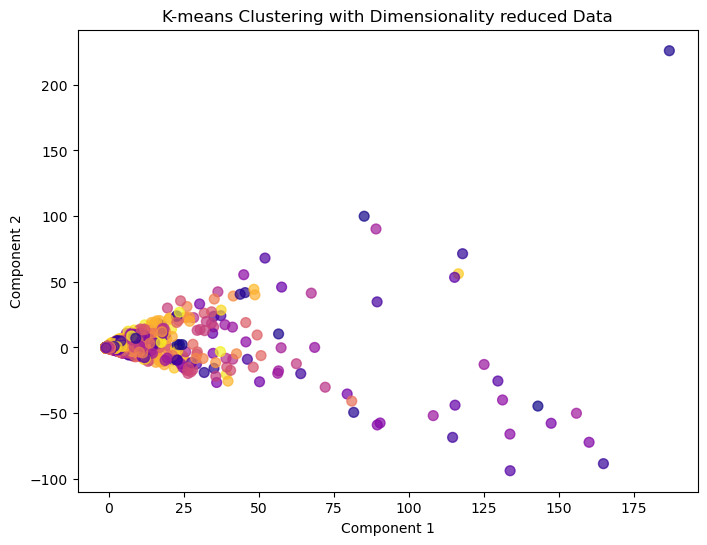

In [6]:
kmean_cluster = kmeans_on_reduced_data(X, k=200)

In [11]:
Counter(kmean_cluster.labels_)

Counter({156: 6492,
         103: 30,
         0: 1613,
         186: 445,
         176: 248,
         32: 606,
         185: 503,
         47: 733,
         199: 1435,
         179: 24,
         138: 1292,
         125: 21,
         105: 126,
         37: 3208,
         197: 685,
         72: 133,
         121: 41,
         181: 84,
         132: 862,
         180: 138,
         80: 274,
         128: 492,
         192: 9,
         124: 210,
         55: 202,
         88: 364,
         129: 373,
         89: 31,
         126: 15,
         108: 46,
         21: 163,
         158: 151,
         145: 32,
         147: 186,
         171: 123,
         154: 367,
         33: 2,
         94: 78,
         17: 110,
         9: 7,
         42: 87,
         91: 1,
         90: 18,
         113: 9,
         106: 70,
         63: 17,
         101: 178,
         135: 100,
         15: 19,
         155: 68,
         198: 39,
         41: 22,
         133: 80,
         123: 99,
         110: 2,
    

In [18]:
def plot_cluster_pop(label_counts):
    #label_counts = Counter(kmean_cluster.labels_)

    # Separate the cluster labels and their counts
    clusters = np.array(list(label_counts.keys()))
    populations = np.array(list(label_counts.values()))

    # Sort the clusters and populations for better visualization
    sorted_indices = np.argsort(clusters)
    clusters_sorted = clusters[sorted_indices]
    populations_sorted = populations[sorted_indices]

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(clusters_sorted, populations_sorted, color='blue')
    plt.xlabel('Cluster Number')
    plt.ylabel('Population')
    plt.title('Population of Each Cluster')
    #plt.xticks(clusters_sorted)  # Ensure all cluster labels are shown
    plt.xticks(clusters_sorted[::50], rotation=90)
    plt.show()

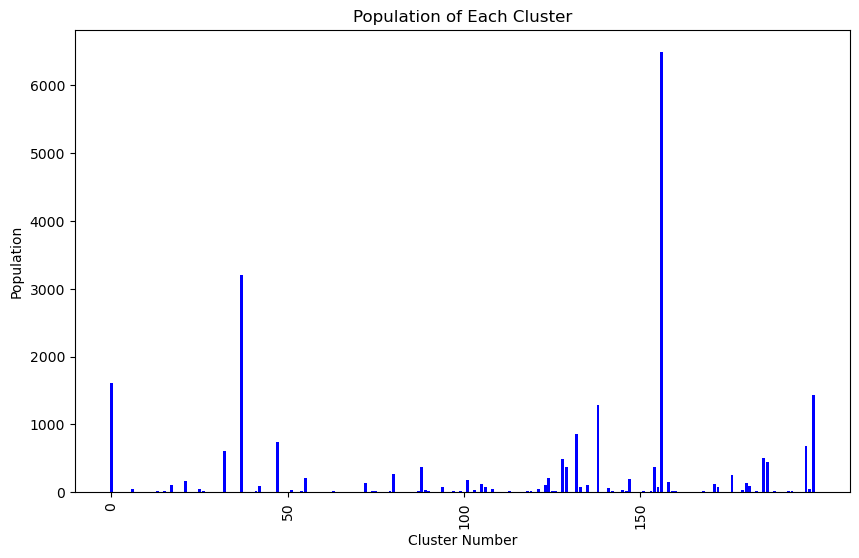

In [19]:
plot_cluster_pop(Counter(kmean_cluster.labels_))

# pyWGCNA: Weighted gene co-expression network analysis (WGCNA) 

> https://academic.oup.com/bioinformatics/article/39/7/btad415/7218311